# Quantum Fourier transform

For this Qiskit in Classrooms module, students must have a working Python environment with the following packages installed:
- `qiskit` v2.1.0 or newer
- `qiskit-ibm-runtime` v0.40.1 or newer
- `qiskit-aer` v0.17.0 or newer
- `qiskit.visualization`
- `numpy`
- `pylatexenc`

To set up and install the packages above, see the [Install Qiskit](/docs/guides/install-qiskit) guide.
In order to run jobs on real quantum computers, students will need to set up an account with IBM Quantum&reg; by following the steps in the [Set up your IBM Cloud account](/docs/guides/cloud-setup) guide.

This module was tested and used XX seconds of QPU time. This is a good-faith estimate; your actual usage may vary.

In [ ]:
# Uncomment and modify this line as needed to install dependencies
#!pip install 'qiskit>=2.1.0' 'qiskit-ibm-runtime>=0.40.1' 'qiskit-aer>=0.17.0' 'numpy' 'pylatexenc'

## Introduction

A Fourier transform is a ubiquitous tool with applications in math, physics, signal processing, data compression, and countless other fields. A *quantum* version of the Fourier transform, aptly named the quantum Fourier transform, forms the basis for some of the most important quantum algorithms. 

Today, after a reminder of the classical Fourier transform, we'll talk about how we implement the quantum Fourier transform on a quantum computer. Then, we'll discuss one of the applications of the quantum Fourier transform to an algorithm called the phase estimation algorithm. Quantum phase estimation is a subroutine in Shor's famous factoring algorithm, which is sometimes referred to as the "crown jewel" of quantum computing. This module builds toward another module all about Shor's algorithm, but it's also meant to be stand-alone. The quantum Fourier transform is a fascinating and useful algorithm in its own right!


## The classical Fourier transform

Before we jump into the quantum Fourier transform, let's first remind ourselves of the classical version. The Fourier transform is a method of transforming from one so-called "basis" to another. You can think of two bases as different perspectives of the same problem — they are both valid ways to express a function, but one or the other might be more illuminating, depending on the problem at hand. Some examples of pairs of bases that are connected by Fourier transform are position and momentum, and time and frequency.

Let's see an example of how the Fourier transform might help us figure out what note an instrument is playing based on its audio waveform. Typically, we see the waveforms represented in the time basis — that is, the amplitude of the wave is expressed as a function of time. 

![Single sinusoidal signal plotted as a function of time.](/learning/images/modules/computer-science/qft/Cnote.avif)

We can Fourier transform this waveform to go from the time basis to the frequency basis:

![Frequency spectrum of the audio waveform. one clear sharp peak at 260 Hz.](/learning/images/modules/computer-science/qft/my-course/Cnotefreq.avif)

In the frequency basis, we can easily see a clear peak at about 260 Hz. That's a middle C! 

Now, you might have been able to do determine that a middle C was being played without the use of a Fourier transform, but what if multiple notes are played at once? Then the waveform becomes more complicated when we plot it in the time basis:

![Displacement vs. time graph of multiple sine waves at once, creating a more complicated periodic pattern.](/learning/images/modules/computer-science/qft/Cchord.avif)

But the frequency spectrum clearly identifies three peaks:

![Frequency spectrum of the above audio waveform. Three peaks at approximately 260 Hz, 330 Hz, and 392 Hz. The last peak is very weak, but visible.](/learning/images/modules/computer-science/qft/Cchordfreq.avif)


This was a C-major chord, playing the notes C, E, and G.

This kind of Fourier analysis can help us extract the frequency components of any sort of complicated signal. 


### Discrete Fourier transform

The Fourier transform is useful for any number of signal-processing applications. But in most of these real-world applications (including the music example we used above), we want to transform a discrete set of $N$ data points — not a continuous function. In this case, we use the *discrete* Fourier transform. The discrete Fourier transform acts on a vector $(x_0, ..., x_{N-1})$ and maps it to the vector $(y_0, ..., y_{N-1})$ according to the formula:

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

where we take $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$. (Note that there are other conventions that have a minus sign in the exponential, so be careful when you see the DFT in the wild.) Recall that $e^{2\pi i \frac{jk}{N}}$ is a periodic function, with period $\frac{N}{k}$. So, by multiplying by this function, the Fourier transform is essentially a way to break the (discrete) function $\{x_{j}\}$ into a linear combination of its constituent periodic functions, each with period $\frac{N}{k}$.



## The quantum Fourier transform

So now, we've seen how the Fourier transform is used to represent a function as a linear combination of a new set of so-called "basis functions." Basis transformations are regularly done on qubit states, too. For example, the state of a single qubit $|\psi\rangle$ can be expressed in the computational basis $|\psi\rangle = c_0 |0\rangle + c_1 |1\rangle$, with basis states $|0\rangle$ and $|1\rangle$, or in the $X$ basis $|\psi\rangle = c_+ |+\rangle + c_- |-\rangle$ with basis states $|+\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$ and $|-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$. Both are equally valid, but one might be more natural than the other, depending on the type of problem you are trying to solve. 

Qubit states can also be expressed in the Fourier basis where a state is expressed in terms of a linear combination of the Fourier basis states $|\phi_y\rangle$, rather than the usual, computational basis states, $|x\rangle$. To do this, you need to apply a quantum Fourier transform (QFT):

$$ | \phi_y \rangle =  \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}\omega_N^{y x} \vert x \rangle$$

with $\omega_N^{yx} = e^{\frac{2\pi y x}{N}}$ as above, and $N$ is the number of basis states in your quantum system. Note that, since we're working with qubits now, $m$ qubits gives you $2^m$ basis states, so $N=2^m$. Here, the basis states are written as just a single number $|x\rangle$ where $x$ ranges from $0$ to $N-1$, but you might more typically see the basis states expressed as $|00...00\rangle$, $|00...01\rangle$, $|00...11\rangle$, ..., $|11...11\rangle$, where each binary digit represents the state of qubit 0 through $m-1$, from right to left. There's an easy way to convert these binary states to a single number: just treat them like binary numbers! So, $|00...00\rangle = |0\rangle$, $|00...01\rangle = |1\rangle$, $|00...10\rangle = |2\rangle$, $|00...11\rangle = |3\rangle$, and so on, all the way up to  $|11...11\rangle = |2^m -1\rangle = |N-1\rangle$.







### Building intuition for the Fourier basis states 

So, we've just gone over what the computational basis states are and how they're ordered: they're the set of states where each qubit is either in $0$ or $1$, and we order them from the state where all qubits are $0$, $|00...00\rangle$, to the state where they are all $1$, $|11...11\rangle$. 

But how can we make sense of the *Fourier* basis states? All of the Fourier basis states are equal superpositions of all the computational basis states, but each state differs from the other in the periodicity in the components' *phase*. To understand this more concretely, let's take a look at the four Fourier basis states of a two-qubit system. The lowest Fourier state is one whose phase does not vary at all:

$$|\phi_0\rangle = \frac{1}{2} (|00\rangle + |01\rangle + |10\rangle + |11\rangle)$$

We can visualize this state by plotting the complex amplitude of each of the terms. The red line guides the eye to show you how the phase of this amplitude winds around the complex plane as a function of the computational basis state. For $|\phi_0\rangle$, the phase remains constant:

![Bar graph of the complex amplitude (x-y plane) for each computational basis state (z-axis) for $phi_0$. They are all real, and so the bars all point to +1 on the x-axis](/learning/images/modules/computer-science/qft/phi0.avif)

The next Fourier basis state is the one whose components' phases wind around from $0$ to $2\pi$ just once:

$$|\phi_1\rangle = \frac{1}{2} (|00\rangle + e^{i\pi/2}|01\rangle + e^{i\pi}|10\rangle + e^{3i\pi/2}|11\rangle) = \frac{1}{2}(|00\rangle + i|01\rangle - |10\rangle - i|11\rangle)$$

And we can see this winding in the plot of complex amplitude vs. computational basis state:

![Bar graph of the complex amplitude (x-y plane) for each computational basis state (z-axis) for $phi_1$. The red line shows how the complex phase accumulates such that it winds around $2\pi$ once as you step through all of the computational basis states.](/learning/images/modules/computer-science/qft/phi1.avif)


So, each state has a phase that is $2\pi/4$ radians higher than the state before it when they're ordered in the standard way, since in this example we have four basis states ($N=4$). The next basis state winds around from 0 to 2$\pi$ twice:

$$|\phi_2\rangle = \frac{1}{2} (|00\rangle + e^{i\pi}|01\rangle + e^{2i\pi}|10\rangle + e^{3i\pi}|11\rangle) = \frac{1}{2} (|00\rangle - |01\rangle + |10\rangle - |11\rangle)$$


![Bar graph of the complex amplitude (x-y plane) for each computational basis state (z-axis) for $phi_2$. The red line shows how the complex phase accumulates such that it winds around $2\pi$ twice as you step through all of the computational basis states.](/learning/images/modules/computer-science/qft/phi2.avif)


Finally, the highest Fourier component is the one with the fastest varying phase. For our example with two qubits, it's the one whose phases wind around from 0 to $2\pi$ three times:

$$|\phi_3\rangle = \frac{1}{2} (|00\rangle + e^{3i\pi/2}|01\rangle + e^{6i\pi/2}|10\rangle + e^{9i\pi/2}|11\rangle) = \frac{1}{2} (|00\rangle - i|01\rangle - |10\rangle + i|11\rangle)$$


![Bar graph of the complex amplitude (x-y plane) for each computational basis state (z-axis) for $phi_3$. The red line shows how the complex phase accumulates such that it winds around $2\pi$ three times as you step through all of the computational basis states.](/learning/images/modules/computer-science/qft/phi3.avif)



In general, for an $n$-qubit state, there will be $2^n$ Fourier basis states, whose frequency in phase variation ranges from constant, for $|\phi_0\rangle$, to rapidly varying for $|\phi_{2^n-1}\rangle$, completing $2^n-1$ windings around $2\pi$ over the superposition of states. So, when we take a QFT of a quantum state, we're essentially doing the same basic analysis that we did for the musical waveform in the Intro. We're determining the Fourier frequency components that contribute to creating the quantum state of interest.

### Try some example QFTs:

Let's try to continue to build our intuition for the quantum Fourier transform by making a state in the computational basis, then seeing what happens when we apply the QFT to it. For now, we'll just treat the QFT as a black box that we apply using the `QFTGate` from the Qiskit circuit library. Later, we'll take a peak under the hood to see how it's implemented. 

We start by loading the necessary packages and selecting a device to run our circuit on:

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFTGate


In [5]:
#Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

#Load the Runtime primitive and session
from qiskit_ibm_runtime import SamplerV2 as Sampler

service = QiskitRuntimeService()

#Use the least busy backend
#backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)
backend = service.backend("ibm_pinguino2")

print(backend.name)

ibm_pinguino2


If you don't have time available on your account or want to use a simulator for any reason, you can run the cell below to set up a simulator that will mimic the quantum device we selected above:

In [6]:
# Load the backend sampler
from qiskit.primitives import BackendSamplerV2

# Load the Aer simulator and generate a noise model based on the currently-selected backend.
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
noise_model = NoiseModel.from_backend(backend)

# Define a simulator using Aer, and use it in Sampler.
backend_sim = AerSimulator(noise_model=noise_model)
sampler_sim = BackendSamplerV2(backend = backend_sim)

In [ ]:
# Alternatively, load a fake backend with generic properties and define a simulator.
from qiskit.providers.fake_provider import GenericBackendV2
backend_gen = GenericBackendV2(num_qubits=18)
sampler_gen = BackendSamplerV2(backend = backend_gen)

#### Single computational basis state

First, let's try just transforming a single computational basis state. We'll start with making a random computational state:

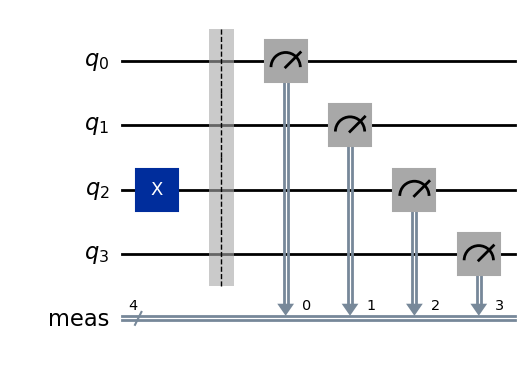

In [7]:
# Step 1: Map

qubits = 4
N = 2**qubits


qc = QuantumCircuit(qubits)

# flip state of random qubits to put in a random single computational basis state
for i in range(1, qubits):
    if np.random.randint(0, 2):
        qc.x(i)


# make a copy of the above circuit. (to be used when we apply the QFT in next part) 
qc_qft = qc.copy() 


qc.measure_all()
qc.draw('mpl')


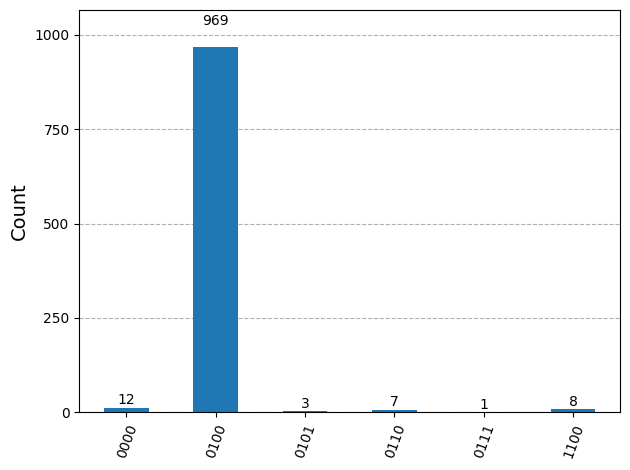

In [8]:

# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc)

# Step 3: Run the job on a real quantum computer OR try fake backend

sampler = Sampler(mode = backend)
pubs = [qc_isa]

# Run the job on real quantum device

job = sampler.run(pubs,shots=1000) 
res = job.result()
counts = res[0].data.meas.get_counts()

# OR Run the job on the Aer simulator with noise model from real backend

#job = sampler_sim.run([qc_isa])
#res = job.result()
#counts = res[0].data.meas.get_counts()

# Step 4: Post-Process
plot_histogram(counts)

Now, let's Fourier transform this state with `QFTGate`:

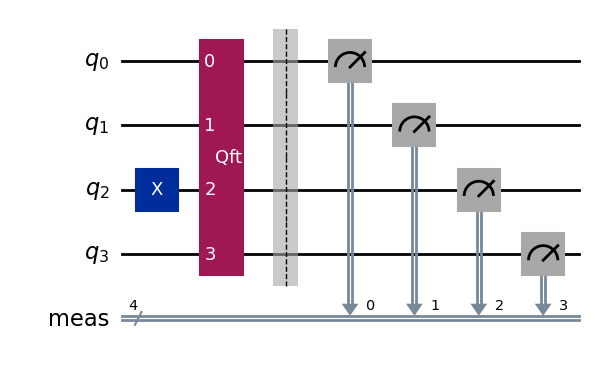

In [9]:
# Step 1: Map

qc_qft.compose(QFTGate(qubits),inplace=True)
qc_qft.measure_all()
qc_qft.draw('mpl')

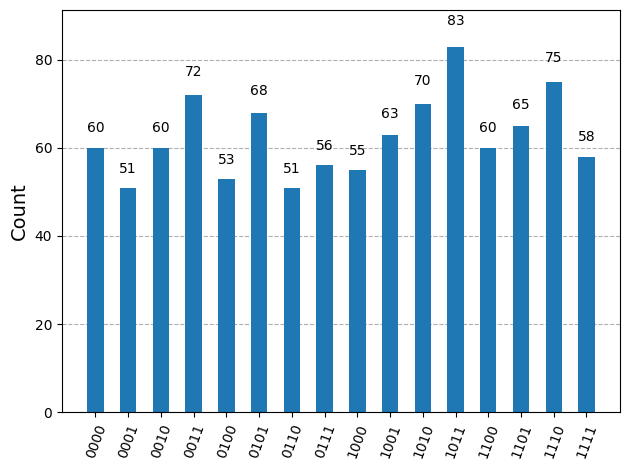

In [10]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc_qft)

# Step 3: Run the job on a real quantum computer - try fake backend

sampler = Sampler(mode = backend)
pubs = [qc_isa]

# Run the job on real quantum device

job = sampler.run(pubs,shots=1000) 
res = job.result()
counts = res[0].data.meas.get_counts()

# OR Run the job on the Aer simulator with noise model from real backend

#job = sampler_sim.run([qc_isa])
#res = job.result()
#counts = res[0].data.meas.get_counts()

# Step 4: Post-Process
plot_histogram(counts)

As you can see, we measure the populations of each state to be more or less equal, give or take some experimental and statistical noise. So, if you take the QFT of a single computational basis state, the result is an equal superposition of all states. If you're familiar with Fourier transforms, this probably doesn't surprise you. One basic principle that can help us build an intuitive connection between a function and its Fourier transform is that the width of a function is inversely proportional to the width of its Fourier transform. So, something that is very localized in time, for example, like a very short pulse, will require a broad range of frequencies to generate that pulse. So that signal will be very broad in Fourier space.

This fact is actually related to quantum uncertainty! Heisenberg's uncertainty principle is typically stated as $\Delta x \Delta p \ge \hbar / 2 $. So if th uncertainty in $x$ ($\Delta x$) is small, the uncertainty in momentum ($\Delta p$) must be big, and vice-versa. It turns out that transforming from the position basis $x$ to the momentum basis $p$ is accomplished through a Fourier transform.

Note: Keep in mind, we're measuring populations in each of the basis states, so we're losing information about the relative phases between the various parts of the superposition. So, while the QFT of any single computational basis state will yield the same even spread in population over all the basis states, the *phases* won't necessarily be the same.



#### Two computational basis states

Now, let's see what happens when we prepare a superposition of computational basis states. What do you think the Fourier transform will look like in this case? 

Let's choose the superposition:

$$|\psi\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |N/2\rangle) = \frac{1}{\sqrt{2}} (|000...0\rangle + |100...0\rangle)$$

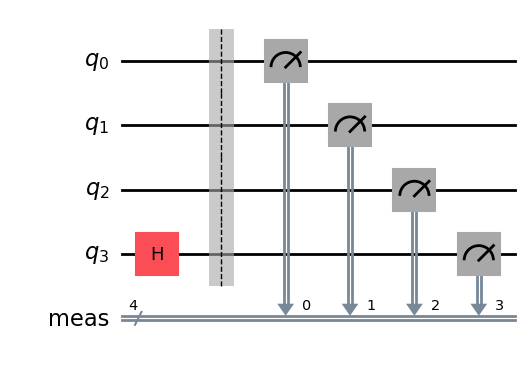

In [11]:
# Step 1: Map
qubits = 4
N = 2**qubits


qc = QuantumCircuit(qubits)

# to make this state, we just need to apply a hadamard to the last qubit

qc.h(qubits-1)


qc_qft = qc.copy()



qc.measure_all()

qc.draw('mpl')

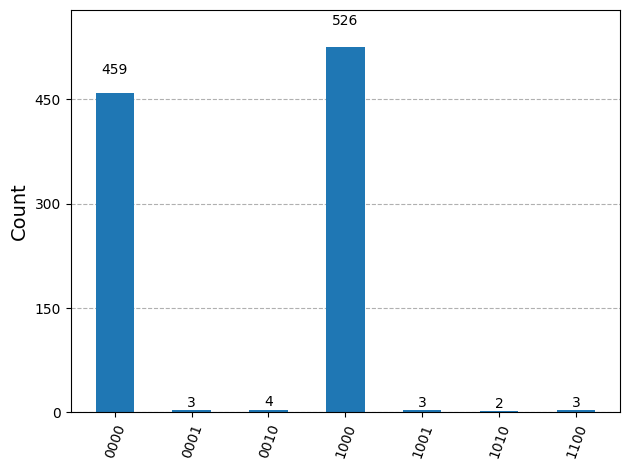

In [12]:
# First, let's go through steps 2-4 for the first circuit, qc

# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc)

# Step 3: Run the job on a real quantum computer - try fake backend

sampler = Sampler(mode = backend)
pubs = [qc_isa]

# Run the job on real quantum device

job = sampler.run(pubs,shots=1000) 
res = job.result()
counts = res[0].data.meas.get_counts()

# OR Run the job on the Aer simulator with noise model from real backend

#job = sampler_sim.run([qc_isa])
#res = job.result()
#counts = res[0].data.meas.get_counts()

# Step 4: Post-Process
plot_histogram(counts)


Now, let's Fourier transform this state with `QFTGate`:

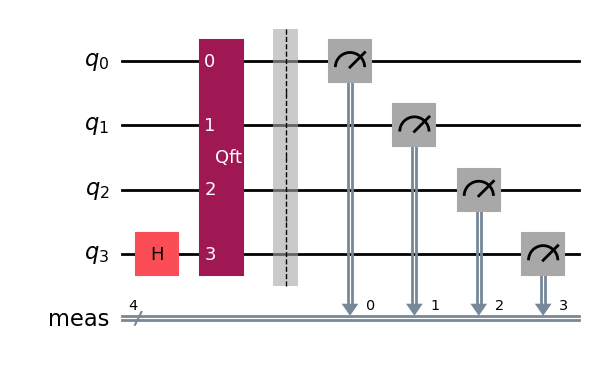

In [13]:
# Step 1: Map 

qc_qft.compose(QFTGate(qubits),inplace=True)
qc_qft.measure_all()
qc_qft.draw('mpl')

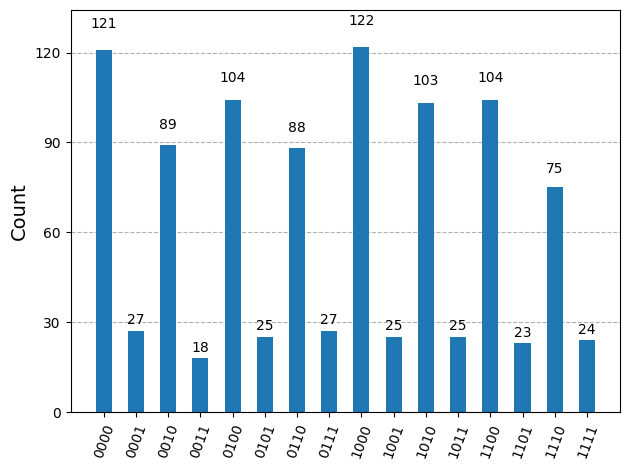

In [14]:

# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc_qft)

# Step 3: Run the job on a real quantum computer OR try fake backend

sampler = Sampler(mode = backend)
pubs = [qc_isa]

# Run the job on real quantum device

job = sampler.run(pubs,shots=1000) 
res = job.result()
counts = res[0].data.meas.get_counts()

# OR Run the job on the Aer simulator with noise model from real backend

#job = sampler_sim.run([qc_isa])
#res = job.result()
#counts = res[0].data.meas.get_counts()

# Step 4: Post-Process
plot_histogram(counts)

This one might be a bit more surprising. It looks like the QFT of the state $|\psi\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |N/2\rangle)$ is a superposition of all of the even basis states. But if we think back to our visualization of each basis state $|\phi_y\rangle$, and how the phase of each component winds around $2\pi$ $y$ times, then the reason we get this result might become clear.

#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

<details>
<summary>

Using the hint above, explain why the result we got for the QFT of $|\psi\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |N/2\rangle)$ is expected. 

</summary>

__Answer:__

The original state has a relative phase of 0 (or an integer multiple of $2\pi$) between the two parts of the superposition. So, we know this state has Fourier components whose phases also match up in that way: i.e. the ones that have 0 phase shift between the |0000> term and the |1000> term. Each Fourier basis state $|\phi_y\rangle$ is composed of terms whose phase accumulates at a rate of $2\pi y/N$, meaning when ordered in the usual way, each term in the superposition has a phase of $2\pi y/N$ greater than the term that came before. So, at the halfway point $N/2$, we want the phase $2\pi y/N * N/2$ to be an integer multiple of $2\pi$. This happens when $y$ is even. 

</details>
<details>

<summary>
    
What computational state superposition would correspond to a QFT with peaks on every odd binary number? 

</summary>

__Answer:__

If you took the QFT of the state $\psi = |0\rangle - |N/2\rangle$, then you would see peaks on every odd binary numbered state.

</details>



## Breaking down the QFT Algorithm

Now that we've gained more intuition into the relationship between qubit states in the computational basis and the Fourier basis, let's dig into the QFT algorithm itself. In other words, what gates do we actually implement on the quantum computer to achieve this transform? 

Let's start small, with a single qubit. So, that means we'll have 2 basis states. QFT$_2$ transforms computational basis states $|0\rangle$ and $|1\rangle$ into Fourier basis states $\phi_0$ and $\phi_1$:

$|\phi_0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

$|\phi_1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$


#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

<details>
<summary>

Use the equation for the QFT in the previous section to verify these two Fourier basis states above.

</summary>
    
__Answer:__

The general QFT formula is:

$$ | \phi_y \rangle =  \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}\omega_N^{y x} \vert x \rangle$$

For a single qubit ($n=1$), $N=2^n=2$, and $\omega_N^{xy} = e^{2\pi i \frac {y x}{2}}$. So, we have

$ | \phi_0 \rangle = \frac{1}{\sqrt{2}}(e^{2\pi i \frac {0 \times 0}{2}}|0\rangle + e^{2\pi i \frac {0 \times 1}{2}}|1\rangle) = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

$ | \phi_1 \rangle = \frac{1}{\sqrt{2}}(e^{2\pi i \frac {1 \times 0}{2}}|0\rangle + e^{2\pi i \frac {1 \times 1}{2}}|1\rangle) = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

</details>



Take a look at those two equations. You might already know of a quantum gate that can be used to implement this transform. That is, there is a gate that transforms the computational basis states $|0\rangle$ and $|1\rangle$ to the respective Fourier basis states $|\phi_0\rangle$ and $|\phi_1\rangle$. It's a Hadamard gate! This becomes even more clear if we introduce a matrix representation of the QFT$_N$ operation:


$$ \text{QFT}_N = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_N^{xy} \vert x \rangle \langle y \vert$$

If you're not familiar with this notation for expressing a quantum operator, that's okay! It is a way to represent an $N \times N$ matrix, where $x$ and $y$ index the columns and rows of the matrix, from $0$ to $N-1$, and $\omega_N^{xy}$ is the value of that particular entry. So, the entry in the 0th column and 2nd row, for example, would just be $\omega_N^{0,2} = e^{2 \pi i \frac{0 \times 2}{N}} = 1$. 

In this representation, each of the computational basis states is associated with one of the basis vectors:

$$|0\rangle = 
\begin{pmatrix}
1 \\ 0 \\ \vdots \\ 0
\end{pmatrix},
|1\rangle = 
\begin{pmatrix}
0 \\ 1 \\ \vdots \\ 0
\end{pmatrix},
|N-1\rangle = 
\begin{pmatrix}
0 \\ 0 \\ \vdots \\ 1
\end{pmatrix}.
$$

If you'd like to learn about this representation in more depth, see John Watrous's lesson on multiple systems in the [Basics of Quantum Information](/learning/courses/basics-of-quantum-information/multiple-systems) course.

Lets try to construct the matrix for QFT$_4$. Using the above formula, we find that

$\text{QFT}_4 = \frac{1}{2} 
\begin{pmatrix}
    1 & 1 & 1 & 1 \\
    1 & i & -1 & -i \\
    1 & -1 & 1 & -1 \\
    1 & -i & -1 & i \\
\end{pmatrix}
$

To implement this matrix on a quantum computer, we'll need to figure out which combination of gates applied to which qubits will give us a unitary transformation that matches the matrix above. We already know one of the gates that will be needed: the Hadamard. Another gate we'll need is the controlled-phase gate, which applies a relative phase $\alpha$ to the target qubit's state, as long as the control qubit is in the state $|1\rangle$. In matrix form this looks like:

$\text{CP}_\alpha = 
\begin{pmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & e^{i\alpha} \\
\end{pmatrix}
$

Since only the state $|11\rangle$ is changed, it actually doesn't matter which qubit is considered the "control" and which is the "target." The result will be the same either way.

Finally, we'll need some SWAP gates too. A SWAP gate swaps the states of two qubits. It looks like:

$\text{SWAP}_\alpha = 
\begin{pmatrix}
    1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 \\
\end{pmatrix}
$

The procedure to construct a QFT$_{2^m}$ circuit on $m$ qubits is iterative — you first apply QFT$_{2^{m-1}}$ to qubits $1$ through $m-1$, then add some gates between qubit $0$ and the other $m-1$ qubits. But to apply QFT$_{2^{m-1}}$, you first need to apply QFT$_{2^{m-2}}$ to qubits 2 through m-1, then add some gates between qubit 1 and the remaining qubits $2$ through $m-1$. It's like a Russian nesting doll: each doll adds a factor of two in the dimension of the QFT circuit, with the smallest doll at the very center, being QFT$_2$, or the Hadamard gate. 

To put a doll inside the next biggest size doll, hence increasing the dimension of the QFT by a factor of two, you always follow the same procedure:

1. First, apply QFT$_{2^{m-1}}$ to the bottom-most $m-1$ qubits. This is your "smaller doll" of the Russian nesting doll set that you will soon put inside the next-biggest doll.
2. Use the next qubit up as a control, and apply controlled phase gates to each of the bottom $m-1$ qubits, with phases to the standard basis states of each of the remaining $m-1$ qubits.
3. Perform a Hadamard on that same top-most qubit that was used as the control in the phase gates.
4. Use SWAP gates to permute the order of the qubits so that the least significant (top) bit becomes the most significant (bottom) bit, and all others shift to the up by one.


We've already been using the `QFTGate` function from the Qiskit circuit library, but now let's take a look inside of some of these QFT gates to verify the above procedure. We can do this with `decompose()`.

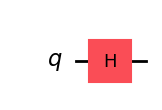

In [15]:
qc = QuantumCircuit(1)
qc.compose(QFTGate(1),inplace=True)
qc.decompose().draw('mpl')

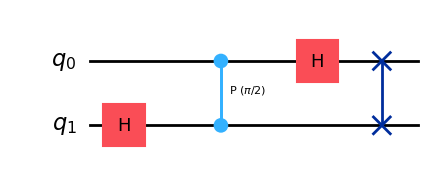

In [16]:
qc = QuantumCircuit(2)
qc.compose(QFTGate(2),inplace=True)
qc.decompose().draw('mpl')

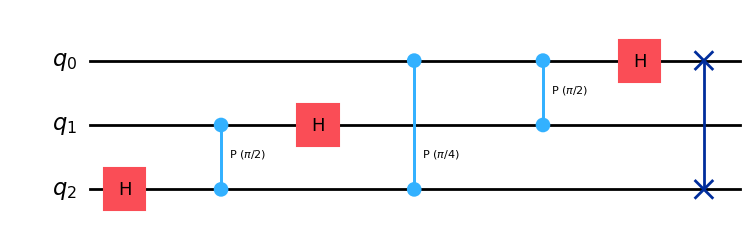

In [17]:
qc = QuantumCircuit(3)
qc.compose(QFTGate(3),inplace=True)
qc.decompose().draw('mpl')

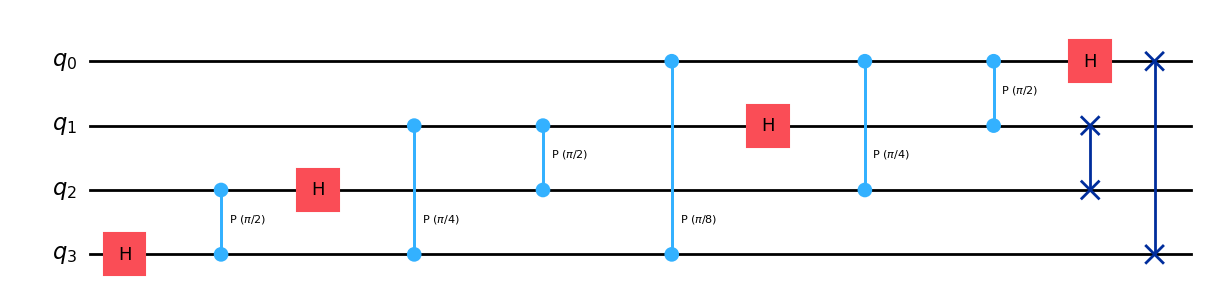

In [18]:
qc = QuantumCircuit(4)
qc.compose(QFTGate(4),inplace=True)
qc.decompose().draw('mpl')

So, hopefully from the first four QFTs you can start to see how each one is nested inside the next largest one. You may have noticed, though, that some of the phase gates are not exactly as prescribed in the procedure we outlined above, and the SWAPs don't appear after each subroutine, but are rather only at the very end of the full QFT. This is just to save us unnecessary gates, which would cause the circuit to take longer and be more error-prone. Instead of implementing the SWAP after each nested doll, instead, the circuit keeps track of where each qubit state *should* be and adjusts the qubits to which it's applying the phase gates accordingly. Then, a final set of SWAPs at the end puts everything in its proper place.

## Application of the QFT: Phase Estimation

Let's see how the QFT can be used to solve a useful problem in quantum computing. Calculating the inverse quantum Fourier transform is a necessary step in an algorithm known as Quantum Phase Estimation (QPE), which is itself a subroutine in many other algorithms, including the "crown jewel" of quantum algorithms, Shor's factoring algorithm.

The goal of QPE is to estimate the eigenvalues of a unitary operator. Unitary operators are ubiquitous in quantum computing, and often, finding the eigenvalues of their associated eigenvectors is a necessary step in a larger algorithm. Depending on the problem, an eigenvalue can represent an energy of a Hamiltonian in a simulation-type problem, can help us find prime factors of a number in Shor's algorithm, or can contain other essential information. QPE is one of the most important and widely used subroutines in quantum computing.

So, what does this have to do with a quantum Fourier transform? Well, as you may recall, any eigenvalue $\lambda$ of a unitary operator has a magnitude $|\lambda| = 1$. So we can write each eigenvalue as a complex number with magnitude one:

$\lambda = e^{2\pi i \theta}$

where $\theta$ is a real number between 0 and 1. If you would like more information on unitary matrices, see John Watrous' [lesson on the subject](/learning/courses/basics-of-quantum-information/multiple-systems) in Basics of Quantum Information.

Note that $\lambda$ is *periodic* in $\theta$. Already, this might suggest to you that a QFT could be involved, since we saw how useful QFTs are for analyzing periodic functions. Below, we'll walk through the algorithm and see precisely how the QFT comes into play.


### How QPE works:

First, we'll start with the simplest QPE algorithm, which roughly estimates the phase to a single binary digit of precision. In other words, this algorithm can distinguish between $\theta = 0 $ and $\theta = 1/2$, but can't do better than that. Here's the circuit diagram:

![Circuit diagram of the QPE algorithm for a single data qubit. A Hadamard is applied to the data qubit. Next, the algorithm uses another helper qubit, on which a controlled-U gate is applied, with the data qubit as the control. After another Hadamard on qubit 0, the qubits are measured.](/learning/images/modules/computer-science/qft/QPE1qubit.avif)

So, the qubits are prepared in the state $|\pi_0\rangle = |\psi\rangle|0\rangle$, where qubit $0$ is in the state $|0\rangle$ and the remaining qubits are in the state $|\psi\rangle$, which is an eigenstate of $U$. After the first Hadamard, the qubit state becomes:

$|\pi_1\rangle = \frac{1}{\sqrt{2}}|\psi\rangle (|0\rangle + |1\rangle)$

The next gate is a "controlled-$U$" gate. This applies the unitary operation $U$ to the bottom qubits that are in the state $|\psi\rangle$ if qubit 0 is in the state $|1\rangle$, but does nothing to $|\psi\rangle$ if qubit 0 is in the state $|0\rangle$. This transforms the qubits to the state:


$|\pi_2\rangle = \frac{1}{\sqrt{2}}( |\psi\rangle|0\rangle + e^{2\pi i \theta}|\psi\rangle|1\rangle)$
 $ =  \frac{1}{\sqrt{2}}|\psi\rangle (|0\rangle + e^{2\pi i \theta}|1\rangle) $

Something weird just happened: the controlled-$U$ gate only uses qubit $0$ as a control qubit, so one might think that this gate wouldn't change qubit 0's state at all. But somehow, it does! Even though the operation was applied to the lower qubits, the overall effect of the gate is to change the phase of qubit $0$. This is known as the "phase kickback mechanism," and is used in many quantum algorithms, including Deutsch-Josza and Grover's algorithms. If you want to learn more about the phase-kickback mechanism, see John Watrous' lesson on [Quantum query algorithms](https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#further-remarks-on-the-phase-kickback) in Fundamentals of Quantum Algorithms.

After the phase-kickback, we apply one more Hadamard to qubit $0$, which results in the state:

$|\pi_3\rangle = |\psi\rangle ( \frac{1+e^{2\pi i \theta}}{2} |0\rangle + \frac{1 - e^{2\pi i \theta}}{2}|1\rangle) = |\psi\rangle ( \cos(\pi\theta) |0\rangle - i \sin(\pi\theta)|1\rangle)$

So, when we measure qubit $0$ at the end, we will measure $|0\rangle$ with 100% certainty if $\theta = 0$ and we will measure $|1\rangle$ with 100% certainty if $\theta = \frac{1}{2}$ (and if our quantum computer is perfect, with no noise). If $\theta$ is something other than this, the final measurement is only probabilistic and only tells us so much.

### QPE with more precision: more qubits

We can extend this simple concept to a more complicated algorithm with arbitrary precision. If instead of just using qubit $0$ to measure the phase, we use $m$ qubits $0$ through $m-1$, then we will be able to estimate the phase with $m$ bits of precision. Let's see how this works:

![Circuit diagram of the QPE algorithm for a multiple qubits. Hadamards are applied to the data qubits 0 through m-1. Then a series of controlled-U gates are applied to the m helper qubits. Finally, an inverse QFT is applied to the qubits and they are measured.](/learning/images/modules/computer-science/qft/QPE_withpi.avif)



This more precise QPE circuit starts out the same as the single bit version: Hadamards are applied to the first $m$ qubits, and the remaining qubits are prepared in the state $|\psi\rangle$, creating the state: 

$$|\pi_1\rangle = \frac{1}{2^{m/2}}|\psi\rangle(|0\rangle+|1\rangle)(|0\rangle+|1\rangle)...(|0\rangle+|1\rangle)$$

Now, the controlled-unitaries are applied. Qubit $0$ is the control for the same unitary $U$ as before. But now, qubit $1$ is the control for the unitary $U^2$, which is just $U$ applied twice. So, the eigenvalue of $U^2$ is $e^{2*2\pi i \theta}$. In general each qubit $k$ from 0 through $m-1$ will be the control for the unitary $U^{2^k}$. That means each of these qubits will experience a phase kickback of $e^{2^k*2\pi i \theta}$. This results in the state:

$$|\pi_2\rangle = |\psi\rangle \otimes \frac{1}{2^{m/2}} (|0\rangle+e^{2^{m-1}2\pi i \theta}|1\rangle)(|0\rangle+e^{2^{m-2}2\pi i \theta}|1\rangle)...(|0\rangle+e^{2\pi i \theta}|1\rangle)$$

This can be rewritten as a sum over the computational basis states:

$$|\pi_2\rangle = |\psi\rangle \otimes \frac{1}{2^{m/2}} \sum_{k=0}^{2^{m}-1} e^{2\pi i k \theta} |k\rangle $$

Does the sum look familiar? It's a QFT! Recall the equation for a quantum Fourier transform:

$$ \text{QFT}_{2^m}| y \rangle =  \frac{1}{\sqrt{2^m}}\sum_{x=0}^{2^m-1}\omega_{2^m}^{y x} \vert x \rangle$$

So, if the phase $ \theta = y/2^m $ for some integer $y$ between $0$ and $2^m-1$, then taking the inverse QFT of this state will result in the state: 

$$|\pi_3\rangle = |\psi\rangle \otimes |y\rangle $$

and from $|y\rangle$, we can deduce $\theta$.

If $\theta/2^m$ is *not* an integer multiple, however, then taking the inverse QFT will only *approximate* $\theta$. How well it approximates $\theta$ will be probabilistic, meaning we won't always get the best approximation, but it will be pretty close, and the more qubits $m$ you use, the better the approximation you will get. To learn about how to quantify this approximation of $\theta$, check out John Watrous' lesson on [Phase estimation and factoring](learning/courses/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring) in Fundamentals of Quantum Algorithms. 


### Conclusion

Hopefully this module gave you a sense for what a QFT is, how it's implemented on a quantum computer, and how useful it can be in solving problems. We gave you a taste for its usefulness when we saw how it can be used in quantum phase estimation to learn about the eigenvalues of a unitary matrix. 


### Critical Concepts

- The Quantum Fourier Transform is the quantum analog to the Discrete Fourier Transform.
- The QFT is an example of a basis transformation.
- The Quantum Phase Estimation procedure relies on the phase kickback mechanism from the controlled-unitary operations, as well as an inverse QFT.
- QFT and QPE are both widely used subroutines in numerous quantum algorithms

## Questions

### True/False

1. T/F The Quantum Fourier Transform is the quantum analogue of the classical discrete Fourier transform (DFT).
2. T/F QFT can be implemented using only Hadamard and CNOT gates.
3. T/F QFT is a key component of Shor’s algorithm.
4. T/F The output of Quantum Phase Estimation is a quantum state representing the eigenvector of the operator.
5. T/F QPE requires the use of the inverse Quantum Fourier Transform (QFT†).
6. T/F In QPE, if the phase $\phi$ is exactly representable with $n$ bits, the algorithm gives the correct result with probability 1. 

### Short Answers
1. How many qubits are needed to perform a QFT on a system with $2^n$ data points?
2. Can the QFT be used on a state that is not a computational basis state? If so, what happens?
3. How does the number of control qubits used in QPE affect the resolution of the resulting phase estimate?


### Problems:

1. Use matrix multiplication to verify that the steps in the QFT algorithm indeed result in the $\text{QFT}_4$ matrix:
   
$$
\text{QFT}_4 = \frac{1}{2} 
\begin{pmatrix}
    1 & 1 & 1 & 1 \\
    1 & i & -1 & -i \\
    1 & -1 & 1 & -1 \\
    1 & -i & -1 & i \\
\end{pmatrix}
$$

(You don't have to do this by hand!)



### Challenge problems: 

1. Make a 4-qubit state that is an equal superposition of all odd computational bases: $|\psi\rangle = |0001\rangle + |0011\rangle + |0101\rangle + |0111\rangle +|1001\rangle +|1011\rangle +|1101\rangle +|1111\rangle$. Then perform a QFT on the state. What is the resulting state? Explain why your result makes sense, using your knowledge of Fourier transforms.


